# Text-to-Image Generator using Pre-trained Models

# This notebook demonstrates how to create a Text-to-Image Generator using pre-trained models from Hugging Face. We will use the CLIP model for text processing and the Stable Diffusion pipeline for image generation.

## Step 1: Install Necessary Libraries



In [10]:
# First, we need to install the required libraries. Run the following cell to install `torch`, `transformers`, and `diffusers`.
!pip install torch transformers diffusers


In [1]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter nbextension install --py widgetsnbextension --sys-prefix


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [-

## Step 2: Load Pre-trained Models

We will load the CLIP model for text processing and the Stable Diffusion pipeline for image generation. These models will be downloaded and cached locally.


In [4]:
import torch
from transformers import CLIPProcessor, CLIPModel
from diffusers import StableDiffusionPipeline

# Load the processor and model locally
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

# Load the Stable Diffusion pipeline locally
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipe = pipe.to("cpu")  # Use GPU if available


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Step 3: Define Functions for Preprocessing and Image Generation

We will define functions to preprocess the input text and generate images using the pre-trained models.


In [5]:
# Define a function to preprocess the input text
def preprocess_text(text):
    inputs = processor(text=[text], images=None, return_tensors="pt", padding=True)
    return inputs

# Define a function to generate an image from text
def generate_image(text):
    inputs = preprocess_text(text)
    # Generate the image
    image = pipe(text).images[0]
    return image


## Step 4: Display and Save Generated Images

We will define a function to display and save the generated images using PIL and matplotlib.


  0%|          | 0/50 [00:00<?, ?it/s]

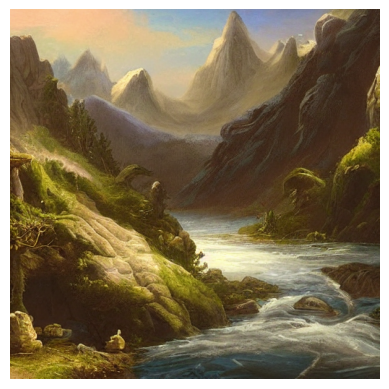

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Define a function to display and save the generated image
def display_and_save_image(image, filename):
    image.show()
    image.save(filename)

# Example usage
text = "A fantasy landscape with mountains and a river"
generated_image = generate_image(text)
display_and_save_image(generated_image, "fantasy_landscape.png")

# Display the image using matplotlib for better inline display
plt.imshow(generated_image)
plt.axis('off')  # Hide axes
plt.show()


## Summary

This notebook demonstrates how to create a Text-to-Image Generator using pre-trained models from Hugging Face. By following the steps, you can generate images from textual descriptions using models downloaded and cached locally.
